In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.sample(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
5,15728773,Male,27,58000,0
114,15739160,Male,42,80000,0
38,15671766,Female,26,72000,0


General Tip: Do train test split before standardization/normalization

In [4]:
X=df[['Age','EstimatedSalary']]
Y=df['Purchased']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#Find the mean and standard devaition from the trained dataset
scaler.fit(X_train)
#Transform/Apply standardization to both the test and train dataset
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

StandardScalar takes in a dataframe as an input and gives an numpy array as an output.
When you scale your data (e.g., with StandardScaler, MinMaxScaler, etc.), the result is usually a NumPy array — which does not have column names.So even though X_test originally had column names like 'age', 'education_num', 'hours_per_week', etc., after scaling, those names are lost.This line just re-wraps the scaled NumPy array into a DataFrame with the original column names.

In [7]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [8]:
round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70103.6
std,10.3,34816.9
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70000.0
75%,46.0,88250.0
max,60.0,150000.0


In [9]:
round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,-0.0
75%,0.8,0.5
max,2.2,2.3


Here, we can clearly see that after standardization the mean is 0 and the standard deviation is 1.

C:\Users\khadk\AppData\Local\Temp\ipykernel_22380\345910832.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


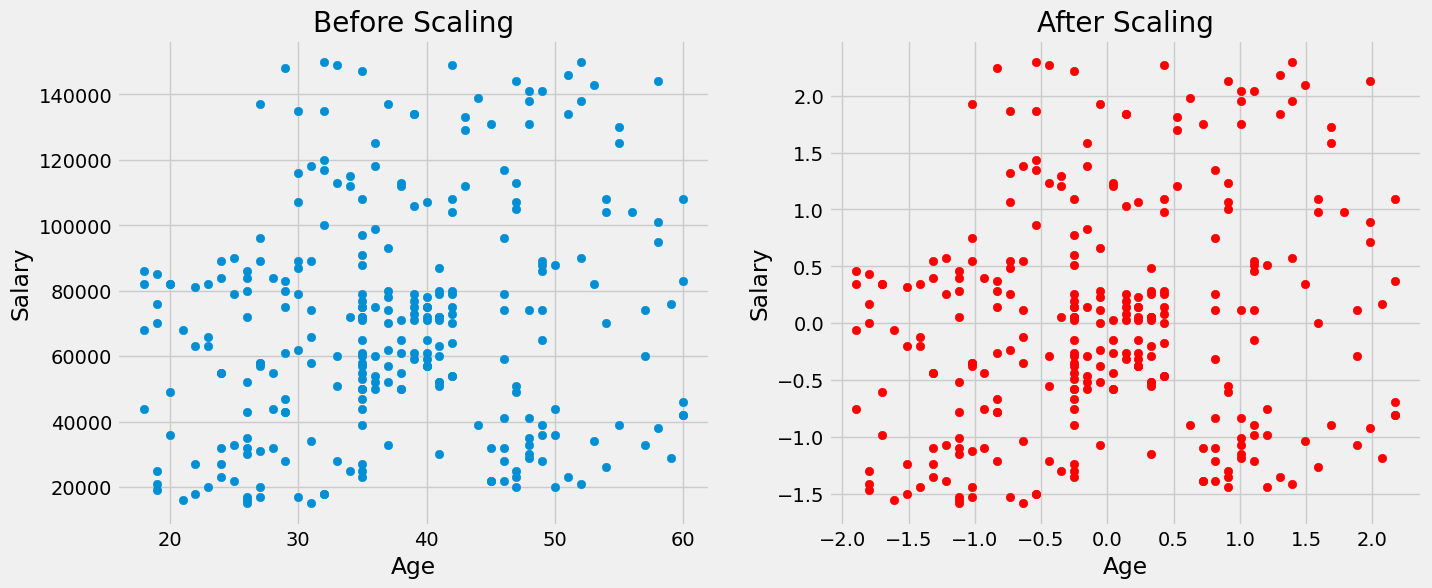

In [10]:
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))

ax[0].scatter(X_train['Age'],X_train['EstimatedSalary'])
ax[0].set_title("Before Scaling")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Salary")
ax[1].scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax[1].set_title("After Scaling")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Salary")

fig.show()

C:\Users\khadk\AppData\Local\Temp\ipykernel_22380\2782045667.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


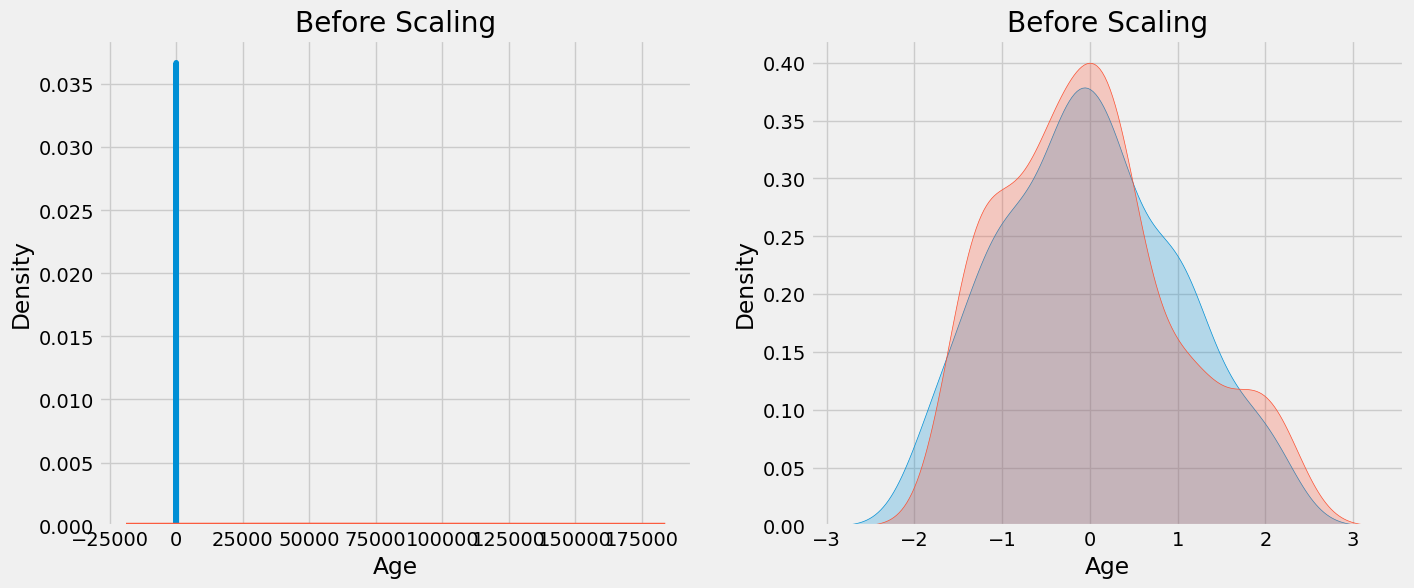

In [11]:
import seaborn as sns
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))

sns.kdeplot(X_train['Age'],ax=ax[0])
sns.kdeplot(X_train['EstimatedSalary'],ax=ax[0])
ax[0].set_title("Before Scaling")

sns.kdeplot(X_train_scaled['Age'],ax=ax[1],fill=True)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax[1],fill=True)
ax[1].set_title("Before Scaling")

fig.show()

We can see the distribution of age and expected value. Since the range of age is very less in comparision to salary it is just a vertical line. Also, since salary is spread in a large range it is spread out. The reason the graph looks so odd is because both age and salary are of different scales. Now, it is easy to compare both the features as both of them are in similar scale.

**Important Points**
1. Standardization does not reduce the effect of outliers. It does not cap or remove outliers, so those extreme values will still be extreme — just on a new scale
2. Standardization is useful for ML algo based on distances such as K-means, KNN, PCA, and Linear Regression. But it is not very useful for Decision Tree as it works by making threshold-based splits
3.  Do train test split before standardization/normalization. If you standardize the entire dataset first, the test data will leak information about its distribution (mean, std) into the training process — which leads to data leakage. That makes your model’s performance look better than it actually is.
4.  StandardScalar takes in a dataframe as an input and gives an numpy array as an output